<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Необходимо:

Подготовить данные;

Провести исследовательский анализ данных;

Построить и обучить модель.

Нужно спрогнозировать сразу две величины:

эффективность обогащения чернового концентрата rougher.output.recovery

эффективность обогащения финального концентрата final.output.recovery

Описание данных:

floatbank - флотационная установка ag, pb, sol, au - Серебро, Свинц, Соль, Золото

Этап Флотации - Rougher

rougher.input.feed_ag(pb, sol, au) - концентрация исходного сырье ag, pb, sol, au

rougher.input.feed_rate - скорость подачи сырья

rougher.input.feed_size - размер гранул сырья

rougher.input.floatbank_10_sulfate(xanthate) - подача флотационных реагентов sulfate, xanthate

rougher.output.concentrate_ag(pb, sol, au) - концентрация на выходе ag, pb, sol, au

rougher.output.tail_ag - отвальные хвосты ag, pb, sol, au после флотации

rougher.output.recovery - Эффективность обогащения после флотации

rougher.state.floatbank10_a_air(level) - параметры объема воздуха и уровня жидкости, характеризующие текущее состояние этапа

rougher.calculation - расчётные характеристики

Этап Первичной очистки - Primary_cleaner

primary_cleaner.input.sulfate(depressant, xanthate) - подача реагентов sulfate, depressant, xanthate

primary_cleaner.input.feed_size - размер гранул сырья на входе

primary_cleaner.output.concentrate_ag(pb, sol, au) - концентрация на выходе ag, pb, sol, au

primary_cleaner.output.tail_ag(pb, sol, au) - отвальные хвосты ag, pb, sol, au после первичной очистки

primary_cleaner.state.floatbank8_a_air(level) - параметры объема воздуха и уровня жидкости, характеризующие текущее состояние 
этапа


Этап Вторичной очистки - Secondary_cleaner

secondary_cleaner.output.tail_ag - отвальные хвосты ag, pb, sol, au после вторичной очистки

secondary_cleaner.state.floatbank2_a_air(level) - параметры объема воздуха и уровня жидкости, характеризующие текущее состояние
этапа

Финальный концентрат - Final

final.output.recovery - Эффективность обогащения финального концентрата

final.output.concentrate_ag(pb, sol, au) - финальный концентрат ag, pb, sol, au

final.output.tail_ag(pb, sol, au) - финальные отвальные хвосты ag, pb, sol, au


## Подготовка данных

In [285]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
import seaborn as sns
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [286]:
df_train.head(5)

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3             

In [287]:
df_test.head(5)

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  \
0                             1400.102998   
1                             1396.151033   
2                             1398.075709   
3                             1400.129303   
4                             1402.172226   

   primary_cleaner.state.floatbank8_c_level  \
0                               -500.704369   
1                               -499.240168   
2                               -502.151509   
3                               -498.355873   
4                               -500.810606   

   primary_cleaner.state.floatbank8_d_air  \
0                             1399.001695   
1                             1399.508091   
2                             1399.497088   
3                             1401.065165   
4                             1399.480508   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                               -499.485144              13.128569   
1                               -500.416324              13.036280   
2                               -499.715479              13.138412   
3                               -501.038738              12.400507   
4                               -499.374053              11.327427   

   rougher.input.feed_pb  rougher.input.feed_rate  rougher.input.feed_size  \
0               5.636710               489.793655                62.710452   
1               5.526065               490.104534                61.961163   
2               5.426561               489.617969                66.903807   
3               5.114758               476.618130                59.865919   
4               4.767383               488.248117                63.315324   

   rougher.input.feed_sol  rougher.input.feed_au  \
0               42.022440              12.084103   
1               41.187903              11.918977   
2               42.546294              12.091332   
3               41.

In [288]:
df_full.head(5)

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3             

In [289]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [290]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [291]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             


Выведем столбцы, которых нет в тестовой выборке:

In [292]:
missing_columns = set(df_full.columns) - set(df_test.columns)
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

df_train = df_train.replace(float("-inf"),np.nan)
df_test = df_test.replace(float("-inf"),np.nan)

Проверим корректность расчета параметра recovery

In [293]:
def apply_recovery(row):
    (input_au,
     output_au,
     output_tail) = (row["rougher.input.feed_au"],
                     row["rougher.output.concentrate_au"],
                     row["rougher.output.tail_au"])
    recovery_metric = (((output_au) * ((input_au) - (output_tail)))/
                       (((input_au) * ((output_au) - (output_tail))))) * 100
    return recovery_metric

In [294]:
test1 = df_train.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"],axis = 0).apply(
                                                                        apply_recovery,axis = 1)

In [295]:
MAE(df_train.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"])["rougher.output.recovery"],
                       test1)


9.682896147825551e-15

Выведим колличество пропусков во всех датасетах

In [296]:
df_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [297]:
def isna(df):
    return df.isna().sum()

In [298]:
isna(df_train)

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [299]:
isna(df_test)

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [300]:
isna(df_full)

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Преведем дату и время к одному формату

df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_train = df_train.set_index(['date'])

df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_test = df_test.set_index(['date'])

df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
df_full = df_full.set_index(['date'])

In [301]:
datasets = [df_train, df_test, df_full]
for dataset in datasets:
    print("Shape:", dataset.shape)
    print("NA's", dataset.isna().sum().sum())
    print("Duplicates:", dataset.duplicated().sum())
    print("--------------------------------------")
    dataset["date"] = pd.to_datetime(dataset["date"]) # приведем к нужному формату дату
Shape: (16860, 87)

Shape: (14149, 87)
NA's 4100
Duplicates: 0
--------------------------------------
Shape: (5290, 53)
NA's 90
Duplicates: 0
--------------------------------------
Shape: (19439, 87)
NA's 4481
Duplicates: 0
--------------------------------------


Вывод: 

Данные предобработаны для дальнейшего анализа и построения моделей.
эффективность обогащения рассчитана правильно. MAE между нашими расчётами и значением признака одинаковы. Т.е. смело можно использовать данные из таблицы
Проанализированы признаки, недоступные в тестовой выборке. Эти данные отсутствуют на момент прогноза, т.к. замеряются и/или рассчитываются значительно позже output — параметры продукта
    
    

## Анализ данных

In [302]:
df_concentrate = df_train[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au',
                           'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
                           'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
                           'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
#def concentrat(df_concentrate):
#    return df_concentrate





In [303]:
df_concentrate_au = df_train[['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
#def concentrat(df_concentrate):
#    return df_concentrate





In [304]:
df_concentrate.head(5)



rougher.input.feed_ag  rougher.input.feed_pb  rougher.input.feed_au  \
0               6.100378               2.284912               6.486150   
1               6.161113               2.266033               6.478583   
2               6.116455               2.159622               6.362222   
3               6.043309               2.037807               6.118189   
4               6.060915               1.786875               5.663707   

   rougher.output.concentrate_ag  primary_cleaner.output.concentrate_ag  \
0                      11.500771                               8.547551   
1                      11.615865                               8.558743   
2                      11.695753                               8.603505   
3                      11.915047                               7.221879   
4                      12.411054                               9.089428   

   final.output.concentrate_ag  rougher.output.concentrate_pb  \
0                     6.055403                       7.101074   
1                     6.029369                       7.278807   
2                     6.055926                       7.216833   
3                     6.047977                       7.175616   
4                     6.148599                       7.240205   

   primary_cleaner.output.concentrate_pb  final.output.concentrate_pb  \
0                              10.389648                     9.889648   
1                              10.497069                     9.968944   
2                              10.354494                    10.213995   
3                               8.496563                     9.977019   
4                               9.986786                    10.142511   

   rougher.output.concentrate_au  primary_cleaner.output.concentrate_au  \
0                      19.793808                              34.174427   
1                      20.050975                              34.118526   
2                      19.737170                              33.969464   
3                      19.320810                              28.260743   
4                      19.216101                              33.044932   

   final.output.concentrate_au  
0                    42.192020  
1                    42.701629  
2                    42.657501  
3                    42.689819  
4                    42.774141

from pylab import rcParams
rcParams['figure.figsize'] = (10, 10)
df_concentrate_au.plot(xlim=(0, 30))

plt.show()


In [305]:
df_concentrate_au


rougher.input.feed_au  rougher.output.concentrate_au  \
0                   6.486150                      19.793808   
1                   6.478583                      20.050975   
2                   6.362222                      19.737170   
3                   6.118189                      19.320810   
4                   5.663707                      19.216101   
...                      ...                            ...   
14144               5.335862                      18.603550   
14145               4.838619                      18.441436   
14146               4.525061                      15.111231   
14147               4.362781                      17.834772   
14148               4.365491                      17.804134   

       primary_cleaner.output.concentrate_au  final.output.concentrate_au  
0                                  34.174427                    42.192020  
1                                  34.118526                    42.701629  
2                                  33.969464                    42.657501  
3                                  28.260743                    42.689819  
4                                  33.044932                    42.774141  
...                                      ...                          ...  
14144                              32.940215                    46.713954  
14145                              32.925325                    46.866780  
14146                              31.856742                    46.795691  
14147                              30.770892                    46.408188  
14148                              30.356618                    46.299438  

[14149 rows x 4 columns]

In [306]:
#from pylab import rcParams
df_concentrate_au.mean()


rougher.input.feed_au                     7.866577
rougher.output.concentrate_au            19.439958
primary_cleaner.output.concentrate_au    32.386836
final.output.concentrate_au              44.003792
dtype: float64

In [307]:
df_concentrate.mean()

rougher.input.feed_ag                     8.579195
rougher.input.feed_pb                     3.522778
rougher.input.feed_au                     7.866577
rougher.output.concentrate_ag            11.775812
primary_cleaner.output.concentrate_ag     8.200916
final.output.concentrate_ag               5.142034
rougher.output.concentrate_pb             7.664555
primary_cleaner.output.concentrate_pb     9.588862
final.output.concentrate_pb              10.132960
rougher.output.concentrate_au            19.439958
primary_cleaner.output.concentrate_au    32.386836
final.output.concentrate_au              44.003792
dtype: float64

from pylab import rcParams
#plt.plot(df_concentrate.mean(), kind='bar')
df_concentrate.plot(kind='bar')
rcParams['figure.figsize'] = (20, 20)

In [308]:
import plotly.graph_objs as go
conc_au = pd.DataFrame()
conc_ag = pd.DataFrame()
conc_pb = pd.DataFrame()
#first = 'rougher.input.feed_'
#second = 'rougher.output.concentrate_'
#third = 'primary_cleaner.output.concentrate_'
#fourth = 'final.output.concentrate_'

conc_au['золото'] = df_concentrate[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].sum(axis=1)
conc_ag['серебро'] = df_concentrate[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].sum(axis=1)
conc_pb['свинец'] = df_concentrate[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].sum(axis=1)

x0 = conc_au['золото']
x1 = conc_ag['серебро']
x2 = conc_pb['свинец']


In [309]:
# Hist
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name="золото"))
fig.add_trace(go.Histogram(x=x1, name="серебро"))
fig.add_trace(go.Histogram(x=x2, name="свинец"))

fig.update_layout(
    title_text='Концентрация веществ на разных этапах', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0 # gap between bars of the same location coordinates
)

fig.show()

Вывод:
- Концентрация золота увеличивается на каждом этапе очистки и финальный концентрат достигает значения концентрации 44 - медианное значение.  
- Концентрация серебра максимальна в черновом концентрате после флотации (медиана - 11,5).  
- Концентрация свинца также возрастает на каждом этапе, на втором этапе очистки совсем немного увеличивается медиана, но заметно снижается разброс значений.

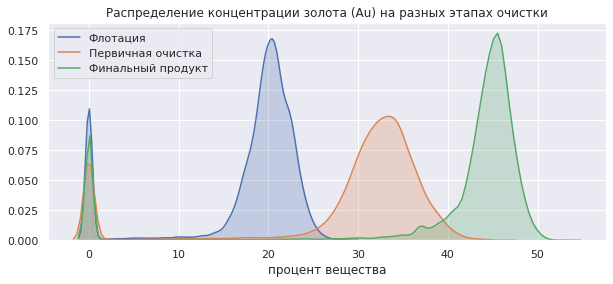

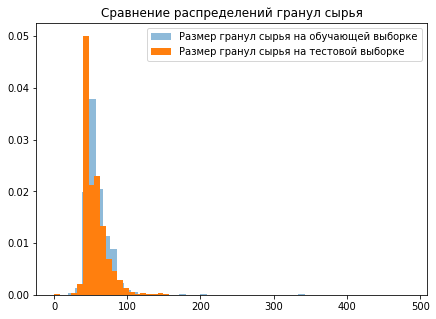

In [310]:
from pylab import rcParams
line_blue=plt.hist(df_train['rougher.input.feed_size'], label='Размер гранул сырья на обучающей выборке',density=True, bins=50, alpha=0.5)
line_red = plt.hist(df_test['rougher.input.feed_size'],label='Размер гранул сырья на тестовой выборке',density=True,bins=50)
# задаем стили для линий
plt.title("Сравнение распределений гранул сырья")
rcParams['figure.figsize']= (5, 10)

plt.legend()

plt.show()

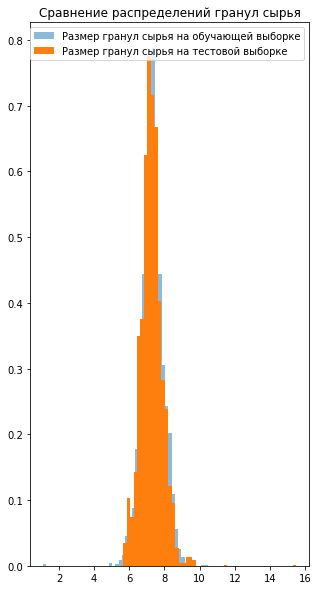

In [311]:
line_blue=plt.hist(df_train['primary_cleaner.input.feed_size'], label='Размер гранул сырья на обучающей выборке',density=True, bins=50, alpha=0.5)
line_red = plt.hist(df_test['primary_cleaner.input.feed_size'],label='Размер гранул сырья на тестовой выборке',density=True,bins=50)
# задаем стили для линий
plt.title("Сравнение распределений гранул сырья")
rcParams['figure.figsize']= (7, 5)

plt.legend()

plt.show()

Распределение размеров грнанул в выборках  похоже на нормальное.

In [312]:
summ_conc = pd.DataFrame()
first = 'rougher.input.feed_'
second = 'rougher.output.concentrate_'
third = 'primary_cleaner.output.concentrate_'
fourth = 'final.output.concentrate_'

summ_conc['сырье'] = df_train[[first+'au', first+'ag', first+'pb']].sum(axis=1)
summ_conc['черновой концентрат'] = df_train[[second+'au', second+'ag', second+'pb']].sum(axis=1)
summ_conc['концентрат после очистки'] = df_train[[third+'au', third+'ag', third+'pb']].sum(axis=1)
summ_conc['финальный концентрат'] = df_train[[fourth+'au', fourth+'ag', fourth+'pb']].sum(axis=1)

x0 = summ_conc['сырье']
x1 = summ_conc['черновой концентрат']
x2 = summ_conc['концентрат после очистки']
x3 = summ_conc['финальный концентрат']

In [313]:
# Hist
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name="сырье"))
fig.add_trace(go.Histogram(x=x1, name="черновой концентрат"))
fig.add_trace(go.Histogram(x=x2, name="концентрат после очистки"))
fig.add_trace(go.Histogram(x=x3, name="финальный концентрат"))

fig.update_layout(
    title_text='Суммарная концентрация веществ', # title of plot
    #xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0 # gap between bars of the same location coordinates
)

fig.show()

In [314]:
# columns with concentrtion of metalls on different stages
columns_with_metall_concentration = [first+'au', first+'ag', first+'pb', second+'au', second+'ag', second+'pb', 
                   third+'au', third+'ag', third+'pb', fourth+'au', fourth+'ag', fourth+'pb']

In [315]:
# Здесь смотрим на количество нулевых значений в столбцах обработки каждого этапа для каждого металла
i = 1
for col in columns_with_metall_concentration:
    zeros_count = len(df_train[df_train[col] == 0])
    print(zeros_count)
    if i % 3 == 0:
        print("------")
    i += 1
print("Total row nums in df:", len(df_train))
print("Total na in df:", df_train[columns_with_metall_concentration].isna().sum().sum())

0
0
0
------
297
297
297
------
74
74
74
------
58
58
58
------
Total row nums in df: 14149
Total na in df: 188


In [316]:
# Оставим только часть наблюдений с нулевыми значениями, чтобы модель не переобучалась на них
i = 1
for col in [first+'au', second+'au', third+'au', fourth+'au']:
    
    zeros_rows = df_train[df_train[col] == 0]
    zeros_rows_indexes = zeros_rows.index
    df_train.drop(zeros_rows_indexes, axis=0, inplace=True)
    
    df_with_zeros_samples = zeros_rows.sample(frac=0.7)
    
    df_train = pd.concat([df_train, df_with_zeros_samples])

In [317]:
i = 1
for col in columns_with_metall_concentration:
    zeros_count = len(df_train[df_train[col] == 0])
    print(zeros_count)
    if i % 3 == 0:
        print("------")
    i += 1
print("Total row nums in df:", len(df_train))

0
0
0
------
208
208
208
------
50
50
50
------
40
40
40
------
Total row nums in df: 14021


In [318]:
for col in columns_with_metall_concentration:

    q_low = df_train[col].quantile(0.1)
    q_hi  = df_train[col].quantile(0.9)

    df_full[col] = df_train[col].apply(lambda x: x if ( ( (x < q_hi) & (x>q_low) ) | (x == 0.0)) else np.nan)

for col in columns_with_metall_concentration:

    q_low = train_df[col].quantile(0.1)
    q_hi  = train_df[col].quantile(0.9)

    df_full[col] = df_full[col].apply(lambda x: x if ( ( (x < q_hi) & (x>q_low) ) | (x == 0.0)) else np.nan

In [319]:
df_train = df_train[(df_train['rougher.input.feed_au'] !=0) & 
         (df_train['rougher.output.concentrate_au'] !=0) &
         (df_train['primary_cleaner.output.concentrate_au'] !=0) &
         (df_train['final.output.concentrate_au'] != 0)]
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  207
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        1
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [320]:
df_train = df_train.loc[df_train.ne(0).all(axis=1)]
df_train.head()

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

In [321]:
summ_conc = pd.DataFrame()
first = 'rougher.input.feed_'
second = 'rougher.output.concentrate_'
third = 'primary_cleaner.output.concentrate_'
fourth = 'final.output.concentrate_'

summ_conc['сырье'] = df_train[[first+'au', first+'ag', first+'pb']].sum(axis=1)
summ_conc['черновой концентрат'] = df_train[[second+'au', second+'ag', second+'pb']].sum(axis=1)
summ_conc['концентрат после очистки'] = df_train[[third+'au', third+'ag', third+'pb']].sum(axis=1)
summ_conc['финальный концентрат'] = df_train[[fourth+'au', fourth+'ag', fourth+'pb']].sum(axis=1)

x0 = summ_conc['сырье']
x1 = summ_conc['черновой концентрат']
x2 = summ_conc['концентрат после очистки']
x3 = summ_conc['финальный концентрат']

In [322]:
# Hist
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name="сырье"))
fig.add_trace(go.Histogram(x=x1, name="черновой концентрат"))
fig.add_trace(go.Histogram(x=x2, name="концентрат после очистки"))
fig.add_trace(go.Histogram(x=x3, name="финальный концентрат"))

fig.update_layout(
    title_text='Суммарная концентрация веществ', # title of plot
    #xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0 # gap between bars of the same location coordinates
)

fig.show()

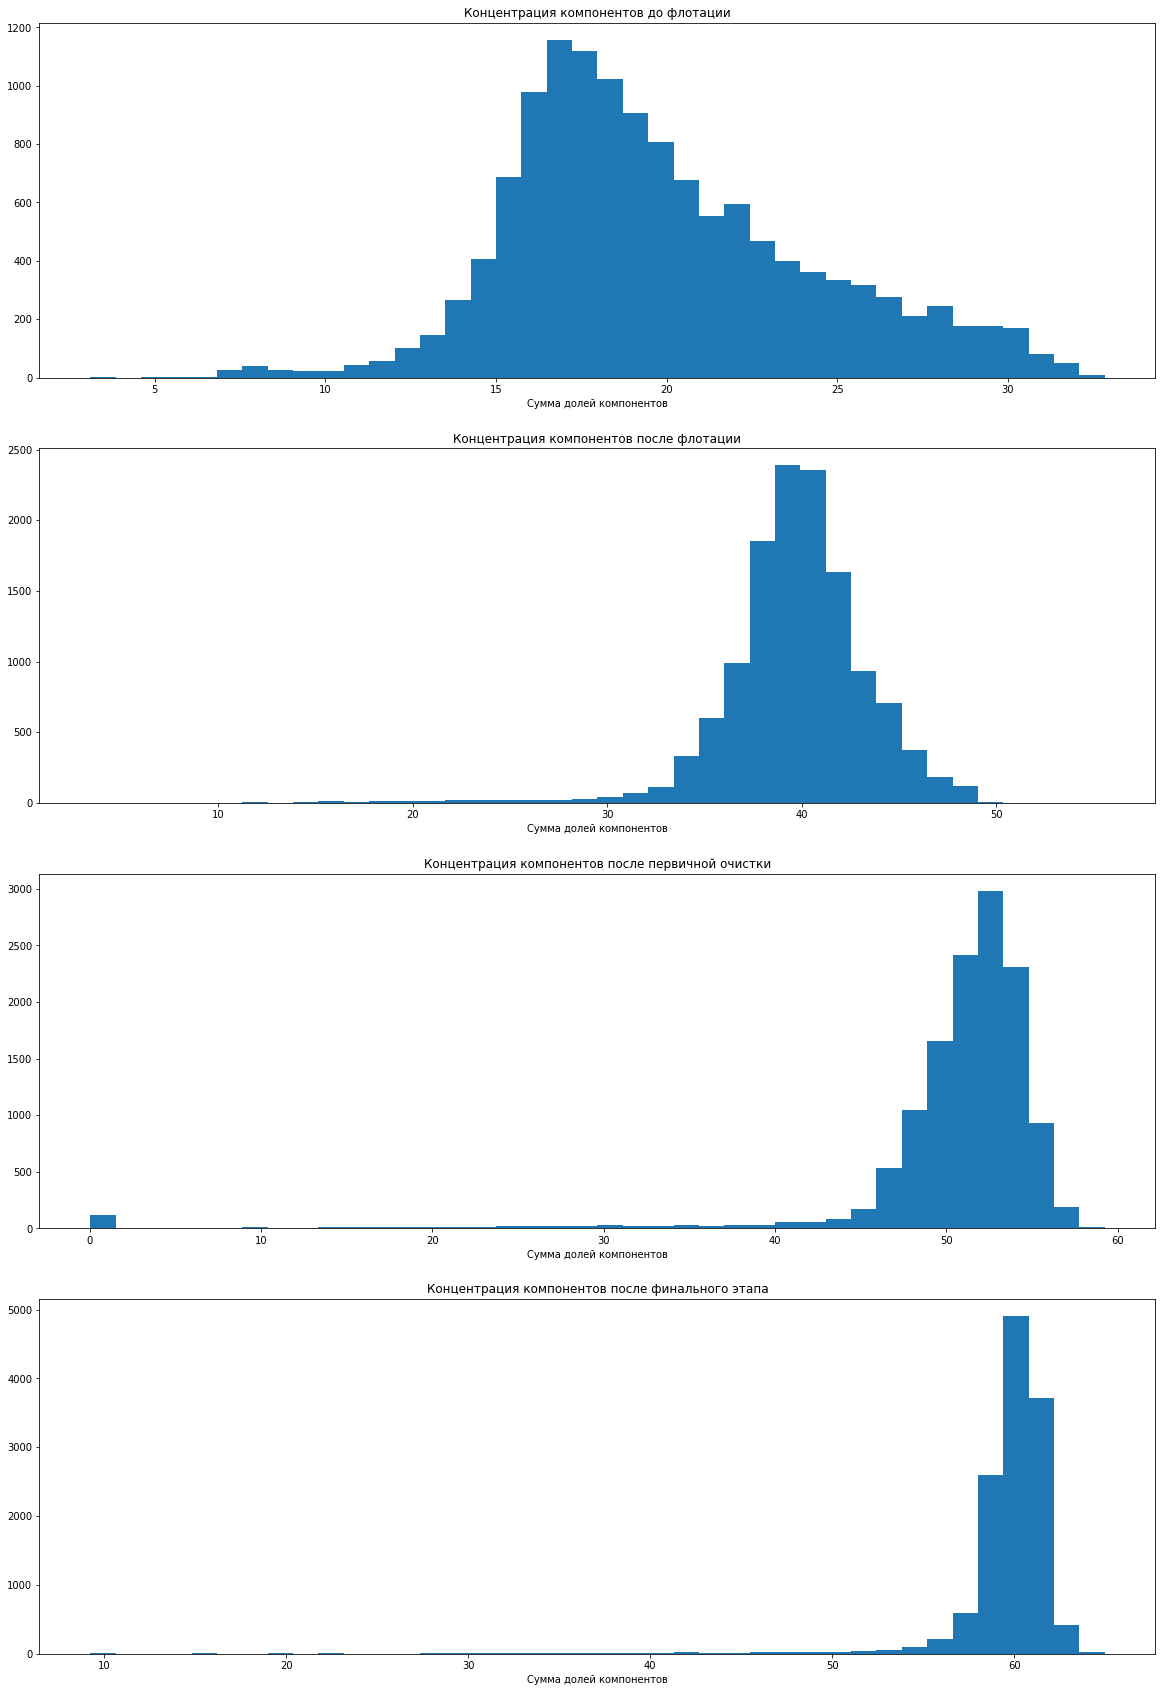

In [323]:
fig,ax = plt.subplots(4,1,figsize = (20,30))
ax[0].hist(summ_conc['сырье'],bins = 40)
ax[1].hist(summ_conc['черновой концентрат'],bins = 40)
ax[2].hist(summ_conc['концентрат после очистки'],bins = 40)
ax[3].hist(summ_conc['финальный концентрат'],bins = 40)
ax[0].set_xlabel("Сумма долей компонентов")
ax[1].set_xlabel("Сумма долей компонентов")
ax[2].set_xlabel("Сумма долей компонентов")
ax[3].set_xlabel("Сумма долей компонентов")
ax[0].set_title("Концентрация компонентов до флотации")
ax[1].set_title("Концентрация компонентов после флотации")
ax[2].set_title("Концентрация компонентов после первичной очистки")
ax[3].set_title("Концентрация компонентов после финального этапа")
plt.show()

#summ_conc['сырье'].hist()


In [324]:
#summ_conc['черновой концентрат'].hist()

In [325]:
#summ_conc['концентрат после очистки'].hist()

In [326]:
#summ_conc['финальный концентрат'].hist()

Вывод:
    
    Размеры гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга, что не окажет существенного влияния на построение модели.

    Концентарция зотлота увеличивается на каждом этапе, Концентрация свинца также возрастает на каждом этап.
    
    На каждом этапе есть нулевые выбросы. После их предобработки можно увидеть, что концентрация возрастает на каждом этапе.

## Модель

Функция для расчета sMAPE

$$ sMAPE = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_i - \hat{y_i}|}{(|y_i| + |\hat{y_i}|) / 2} × 100% $$

$y_i$ — значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество
$\hat{y_i}$ — значение предсказания для объекта с порядковым номером i, например, в тестовой выборке
N — количество объектов в выборке
$\sum_{i=1}^{N}$ — суммирование по всем объектам выборки (i меняется от 1 до N).

In [327]:
def smape(target, predictions):
    numerator = abs(predictions - target)
    divider = (abs(target) + abs(predictions)) / 2
    summa = (numerator / divider).sum()

    smape = (1 / len(target)) * summa * 100
    return smape

Итоговая метрика качества sMAPE final складывается из двух величин:

$$ final   sMAPE = 0.25 × sMAPE(rougher) + 0.75 × sMAPE(final)$$


In [328]:
def smapefinal(rougher, final):
    smape_final_1 = 0.25 * rougher + 0.75 * final
    return smape_final_1


In [329]:
custom_score = make_scorer(smape,greater_is_better=False)

Обучение разных моделей

In [330]:
# Удалим отсутствующие столбцы из train'a
df_train.drop(missing_columns, axis=1, inplace=True)
#df_train['rougher.output.recovery']

In [331]:
df_train.shape

(12936, 53)

def data_to_StandardScaler(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data

Разметим обучающие признаки и целевые признаки rougher.output.recovery и final.output.recovery
df_test содержит все признаки для обучения

In [332]:
def make_copies(train, test, full):
    
    """

    """
    
    train_copy = train.copy(deep=True)
    test_copy = test.copy(deep=True)
    full_copy = full.copy(deep=True)
    
    return train_copy, test_copy, full_copy


def add_target(train, test, full):
    
    """
    Adds target from full
    to train and test
    """
        
    # Добавим target из full_df в test dataset
    train = train.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')
    # Добавим target из full_df в test dataset
    test = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')
    return train, test

    
def delete_na(train, test, full):
    
    """
    Deletes na's from data
    """
    
    train.dropna(inplace=True)
    test.dropna(inplace=True)
    full.dropna(inplace=True)

    return train, test, full


def fill_previous(train, test, full_data):
    
    """
    inputes na with previous value
    """
    
    full_data.fillna(method='ffill', inplace=True)
    train.fillna(method='ffill', inplace=True)
    test.fillna(method='ffill', inplace=True)

    return train, test, full_data


def features_target_split(train, test):
    
    """
    splits target and test
    to features and targets
    """
    
    # train выборка
    target_train = train[['rougher.output.recovery', 'final.output.recovery']]
    features_train = train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)

    # test выборка
    target_test = test[['rougher.output.recovery','final.output.recovery']]
    features_test = test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
    
    return features_train, target_train, features_test, target_test


def scale_minmax(features_train, features_test):
    
    """
    Scales the data
    """
    
    scaler = MinMaxScaler()
    cols_train = features_train.columns
    cols_test = features_test.columns
    
    features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train[cols_train]))
    features_test_scaled = pd.DataFrame(scaler.transform(features_test[cols_test]))
    
    return features_train_scaled, features_test_scaled

In [333]:
def copy_and_add_target(train, test, full):
    
    """
    Makes copies of data and
    adds target from full_df
    """
    
    train_copy, test_copy, full_copy = make_copies(train, test, full)
    train, test = add_target(train_copy, test_copy, full_copy)
    
    return train, test, full_copy


def features_and_scaling(train, test, full):
    
    """
    Splitting and scaling data
    """
    
    features_train, target_train, features_test, target_test = features_target_split(train, test)
    features_train, features_test = scale_minmax(features_train, features_test)
    
    return features_train, target_train, features_test, target_test

In [334]:
def pipeline_with_ffill(train, test, full):
    
    """
    pipeline with ffilling na's
    """
    
    train, test, full = copy_and_add_target(train, test, full)
    train, test, full = fill_previous(train, test, full)
    features_train, target_train, features_test, target_test = features_and_scaling(train, test, full)
    
    return features_train, target_train, features_test, target_test


def pipeline_with_drop_na(train, test, full):
    
    """
    pipeline with dropping na's
    """
    
    train, test, full = copy_and_add_target(train, test, full)
    train, test, full = delete_na(train, test, full)
    features_train, target_train, features_test, target_test = features_and_scaling(train, test, full)
    
    return features_train, target_train, features_test, target_test

In [335]:
def grid_search_cv(features, target):
    
    """
    GridsearchCV with model_and_parameters as param_grid
    
    """
    
    model_and_parameters = [
                            #Model
                            (Lasso(random_state=241), 
                                     # params
                                     {'alpha' : np.linspace(0.1, 3, 20)}),
                            #Model
                            (Ridge(random_state=241), 
                                     # params
                                     {'alpha' : np.linspace(0.1, 3, 20)}),
                            #Model
                            (LinearRegression(),
                                     # params
                                     {})
                                    # Model
#                            (RandomForestRegressor(random_state=241),
                                     # params
#                                    {'n_estimators' : [i for i in range(50,150,10)],
#                                     'max_depth' : [i for i in range(10,40,5)]})
                            ]
    
    best_final_smape = 1000

    for model, params in model_and_parameters:

        scorer = make_scorer(smape, greater_is_better=False)
        grid_rougher = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring=scorer, n_jobs=-1)
        grid_final = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring=scorer, n_jobs=-1)

        grid_rougher.fit(features, target["rougher.output.recovery"])
        rougher_smape = grid_rougher.best_score_

        grid_final.fit(features, target["final.output.recovery"])
        final_smape = grid_final.best_score_

        weighted_final_smape = smapefinal(rougher_smape, final_smape)

        if weighted_final_smape < best_final_smape:
            best_model_rougher = grid_rougher.best_estimator_
            best_model_final = grid_final.best_estimator_
            best_final_smape = weighted_final_smape

        print(model.__class__.__name__, ":", weighted_final_smape)
        
    return best_model_rougher, best_model_final

In [336]:
features_train_scaled_dropped, target_train_dropped, \
        features_test_scaled_dropped, target_test_dropped = pipeline_with_drop_na(df_train, df_test, df_full)

In [337]:
print("Train features length:", len(features_train_scaled_dropped))
print("Train target length:", len(target_train_dropped))
print("----------------------------")
print("Test features length:", len(features_test_scaled_dropped))
print("Test target length:", len(target_test_dropped))

Train features length: 11902
Train target length: 11902
----------------------------
Test features length: 5229
Test target length: 5229


In [ ]:
best_model_rougher_drop_na, best_model_final_drop_na = grid_search_cv(features_train_scaled_dropped, target_train_dropped)

Lasso : -8.223828507513305


In [ ]:
features_train_scaled_ffilled, target_train_ffilled, \
        features_test_scaled_ffilled, target_test_ffilled = pipeline_with_ffill(df_train, df_test, df_full)

In [ ]:
print("Train featrues length:", len(features_train_scaled_ffilled))
print("Train target length:", len(target_train_ffilled))
print("----------------------------")
print("Test featrues length:", len(features_test_scaled_ffilled))
print("Test target length:", len(target_test_ffilled))

In [ ]:
best_model_rougher_ffilled, best_model_final_ffilled = grid_search_cv(features_train_scaled_ffilled, target_train_ffilled)

In [ ]:
preds_rough = best_model_rougher_drop_na.predict(features_test_scaled_dropped)
preds_final = best_model_final_drop_na.predict(features_test_scaled_dropped)
smapefinal(smape(preds_rough, target_test_dropped["rougher.output.recovery"]), 
           smape(preds_final, target_test_dropped["final.output.recovery"]))

###### Сравним нашу модель с константным подходом

In [ ]:
dmb_mean = DummyRegressor(strategy="mean")
dmb_median = DummyRegressor(strategy="median")

In [ ]:
dmb_mean.fit(features_train_scaled_dropped, target_train_dropped["rougher.output.recovery"])
preds_rough = dmb_mean.predict(features_test_scaled_dropped)
dmb_mean.fit(features_train_scaled_dropped, target_train_dropped["final.output.recovery"])
preds_final = dmb_mean.predict(features_test_scaled_dropped)
print("Прогноз по среднему: {:.2f}".format(smapefinal(smape(preds_rough, target_test_dropped["rougher.output.recovery"]), 
           smape(preds_final, target_test_dropped["final.output.recovery"]))))

In [ ]:
dmb_median.fit(features_train_scaled_dropped, target_train_dropped["rougher.output.recovery"])
preds_rough = dmb_median.predict(features_test_scaled_dropped)
dmb_median.fit(features_train_scaled_dropped, target_train_dropped["final.output.recovery"])
preds_final = dmb_median.predict(features_test_scaled_dropped)
print("Прогноз по медиане: {:.2f}".format(smapefinal(smape(preds_rough, target_test_dropped["rougher.output.recovery"]), 
           smape(preds_final, target_test_dropped["final.output.recovery"]))))

Вывод:

Произвели исследовательский анализ данных, проверили наличие пропусков, дубликатов. 
Обнаружили, что концентрация золота и меди увеличивается с каждым этапом, а концентрация серебра снижается после флотации.
Распределения размеров гранул в train и test выборках одинаковы.
Суммарные распределения концентрации скошены влево, а также имеют множество нулевых значений.
Наилучшая модель - Lasso, со значением метрики smape 9,2



## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке